In [1]:
# Standard library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# 加载经验数据
print("Loading empirical data...")
w_media_empirical = pd.read_csv('./new_output/empirical/w_media_risk_data_7days.csv')
o_people_empirical = pd.read_csv('./new_output/empirical/sentiment_data_7days.csv')
m_media_empirical = pd.read_csv('./new_output/empirical/m_media_risk_data_7days.csv')

# 创建经验数据字典
emp_w_risk_p = dict(zip(w_media_empirical['period_id_3d'], w_media_empirical['risk_p']))
emp_m_risk_p = dict(zip(m_media_empirical['period_id_3d'], m_media_empirical['risk_p']))
emp_sentiment_high_p = dict(zip(o_people_empirical['period_id_3d'], o_people_empirical['high_p']))
emp_sentiment_middle_p = dict(zip(o_people_empirical['period_id_3d'], o_people_empirical['middle_p']))
emp_sentiment_low_p = dict(zip(o_people_empirical['period_id_3d'], o_people_empirical['low_p']))

# 设置随机种子确保可重复性
np.random.seed(42)

# 加载网络
from src.modules import *
print("Loading network...")
network = joblib.load('networks/simple_all_new.pkl')
print("Network loaded successfully")

Loading empirical data...
Loading network...
Network loaded successfully


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.voter_model import VoterModel  # 确保voter_model.py在同一目录下

# 创建Voter Model实例
voter_model = VoterModel(network)

# 运行模拟
print("Running Voter Model simulation...")
baseline_voter_history = voter_model.simulate_steps(steps=96)

from src.EnhancedVoterModel import EnhancedVoterModel
network = joblib.load('networks/simple_all_new.pkl')

# from src.EnhancedVoterModel import EnhancedVoterModel
model = EnhancedVoterModel(
    original_network=network,
    temperature=1.0  # 可调节随机性
)
Enhanced_history = model.simulate_steps(steps=96)

Running Voter Model simulation...


In [25]:
import pickle
import pandas as pd
with open('abc_results/abc_results.pkl', 'rb') as f:
    abc_results = pickle.load(f)
best_params = abc_results['best_params']
# 加载网络
print("Loading network...")
network = joblib.load('networks/simple_all_new.pkl')
# 在运行模拟之前设置属性
setattr(network, 't', 0)
setattr(network, 'history', [])
print("Network loaded successfully")

# 运行模拟
print("Starting simulation...")
history_csdag = network.simulate_steps(
    steps=96,
    **best_params
)
print("Simulation completed")

Loading network...
Network loaded successfully
Starting simulation...
Simulation completed


In [20]:
from src.utils.utils import calculate_rmse

# 计算并打印各指标的RMSE
print("\nRoot Mean Square Error (RMSE) between csdag and empirical data:")
print(f"We-media risk RMSE: {calculate_rmse(history_csdag, emp_w_risk_p, 'w_media', 'R'):.3f}")
print(f"Mainstream-media risk RMSE: {calculate_rmse(history_csdag, emp_m_risk_p, 'm_media', 'R'):.3f}")
print(f"Public sentiment high RMSE: {calculate_rmse(history_csdag, emp_sentiment_high_p, 'o_people', 'H'):.3f}")
print(f"Public sentiment middle RMSE: {calculate_rmse(history_csdag, emp_sentiment_middle_p, 'o_people', 'M'):.3f}")
print(f"Public sentiment low RMSE: {calculate_rmse(history_csdag, emp_sentiment_low_p, 'o_people', 'L'):.3f}")


Root Mean Square Error (RMSE) between csdag and empirical data:
We-media risk RMSE: 0.139
Mainstream-media risk RMSE: 0.247
Public sentiment high RMSE: 0.067
Public sentiment middle RMSE: 0.067
Public sentiment low RMSE: 0.080


In [21]:
from src.utils.utils import calculate_rmse

# 计算并打印各指标的RMSE
print("\nRoot Mean Square Error (RMSE) between voter_model and empirical data:")
print(f"We-media risk RMSE: {calculate_rmse(baseline_voter_history, emp_w_risk_p, 'w_media', 'R'):.3f}")
print(f"Mainstream-media risk RMSE: {calculate_rmse(baseline_voter_history, emp_m_risk_p, 'm_media', 'R'):.3f}")
print(f"Public sentiment high RMSE: {calculate_rmse(baseline_voter_history, emp_sentiment_high_p, 'o_people', 'H'):.3f}")
print(f"Public sentiment middle RMSE: {calculate_rmse(baseline_voter_history, emp_sentiment_middle_p, 'o_people', 'M'):.3f}")
print(f"Public sentiment low RMSE: {calculate_rmse(baseline_voter_history, emp_sentiment_low_p, 'o_people', 'L'):.3f}")


Root Mean Square Error (RMSE) between voter_model and empirical data:
We-media risk RMSE: 0.631
Mainstream-media risk RMSE: 0.266
Public sentiment high RMSE: 0.242
Public sentiment middle RMSE: 0.453
Public sentiment low RMSE: 0.294


In [19]:
from src.utils.utils import calculate_rmse

# 计算并打印各指标的RMSE
print("\nRoot Mean Square Error (RMSE) between Enhanced_voter_model and empirical data:")
print(f"We-media risk RMSE: {calculate_rmse(Enhanced_history, emp_w_risk_p, 'w_media', 'R'):.3f}")
print(f"Mainstream-media risk RMSE: {calculate_rmse(Enhanced_history, emp_m_risk_p, 'm_media', 'R'):.3f}")
print(f"Public sentiment high RMSE: {calculate_rmse(Enhanced_history, emp_sentiment_high_p, 'o_people', 'H'):.3f}")
print(f"Public sentiment middle RMSE: {calculate_rmse(Enhanced_history, emp_sentiment_middle_p, 'o_people', 'M'):.3f}")
print(f"Public sentiment low RMSE: {calculate_rmse(Enhanced_history, emp_sentiment_low_p, 'o_people', 'L'):.3f}")


Root Mean Square Error (RMSE) between Enhanced_voter_model and empirical data:
We-media risk RMSE: 0.375
Mainstream-media risk RMSE: 0.291
Public sentiment high RMSE: 0.088
Public sentiment middle RMSE: 0.335
Public sentiment low RMSE: 0.264


In [27]:
# 提取结果用于绘图
time_steps = range(len(baseline_voter_history))
w_media_risk_baseline = [h['w_media']['R'] for h in baseline_voter_history]
m_media_risk_baseline = [h['m_media']['R'] for h in baseline_voter_history]
o_people_high_baseline = [h['o_people']['H'] for h in baseline_voter_history]
o_people_middle_baseline = [h['o_people']['M'] for h in baseline_voter_history]
o_people_low_baseline = [h['o_people']['L'] for h in baseline_voter_history]

w_media_risk_csdag = [h['w_media']['R'] for h in history_csdag]
m_media_risk_csdag = [h['m_media']['R'] for h in history_csdag]
o_people_high_csdag = [h['o_people']['H'] for h in history_csdag]
o_people_middle_csdag = [h['o_people']['M'] for h in history_csdag]
o_people_low_csdag = [h['o_people']['L'] for h in history_csdag]

w_media_risk_Enhanced = [h['w_media']['R'] for h in Enhanced_history]
m_media_risk_Enhanced = [h['m_media']['R'] for h in Enhanced_history]
o_people_high_Enhanced = [h['o_people']['H'] for h in Enhanced_history]
o_people_middle_Enhanced = [h['o_people']['M'] for h in Enhanced_history]
o_people_low_Enhanced = [h['o_people']['L'] for h in Enhanced_history]


In [39]:
# 设置matplotlib的全局样式
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'axes.grid': True,
    'grid.alpha': 0.2,
    'axes.linewidth': 1.2,
    'axes.edgecolor': '#333333'
})

# 优化的Nature配色方案
colors = {
    'models': ['#FF9B9B', '#7EA6E0', '#93D5AB'],  # 柔和的红、蓝、绿
    'empirical': '#2F4858',  # 深灰蓝色
    'lines': ['solid', 'dashed', 'dashdot']
}

# 通用绘图函数
def plot_time_series(ax, data_sets, labels, title, ylabel):
    for i, (data, label) in enumerate(zip(data_sets[:-1], labels[:-1])):
        ax.plot(time_steps, data, color=colors['models'][i], 
                linestyle=colors['lines'][0], linewidth=2.5, 
                label=label, alpha=0.8)
    
    # 绘制经验数据
    ax.plot(empirical_time_steps, data_sets[-1], 
            color=colors['empirical'], linestyle='dashed', 
            linewidth=2.5, label=labels[-1], alpha=0.9)
    
    ax.set_title(title, loc='left', fontweight='bold', pad=15)
    ax.set_xlabel('Time (Days)', fontweight='bold', labelpad=10)
    ax.set_ylabel(ylabel, fontweight='bold', labelpad=10)
    # 调整图例位置，降低一些
    ax.legend(ncol=2, bbox_to_anchor=(0.5, -0.35), loc='center', 
             frameon=True, facecolor='white', edgecolor='none')


C:\Users\wujlin\AppData\Local\Temp\ipykernel_18116\1644548435.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


C:\Users\wujlin\AppData\Local\Temp\ipykernel_18116\2692206196.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 4500x6000 with 0 Axes>

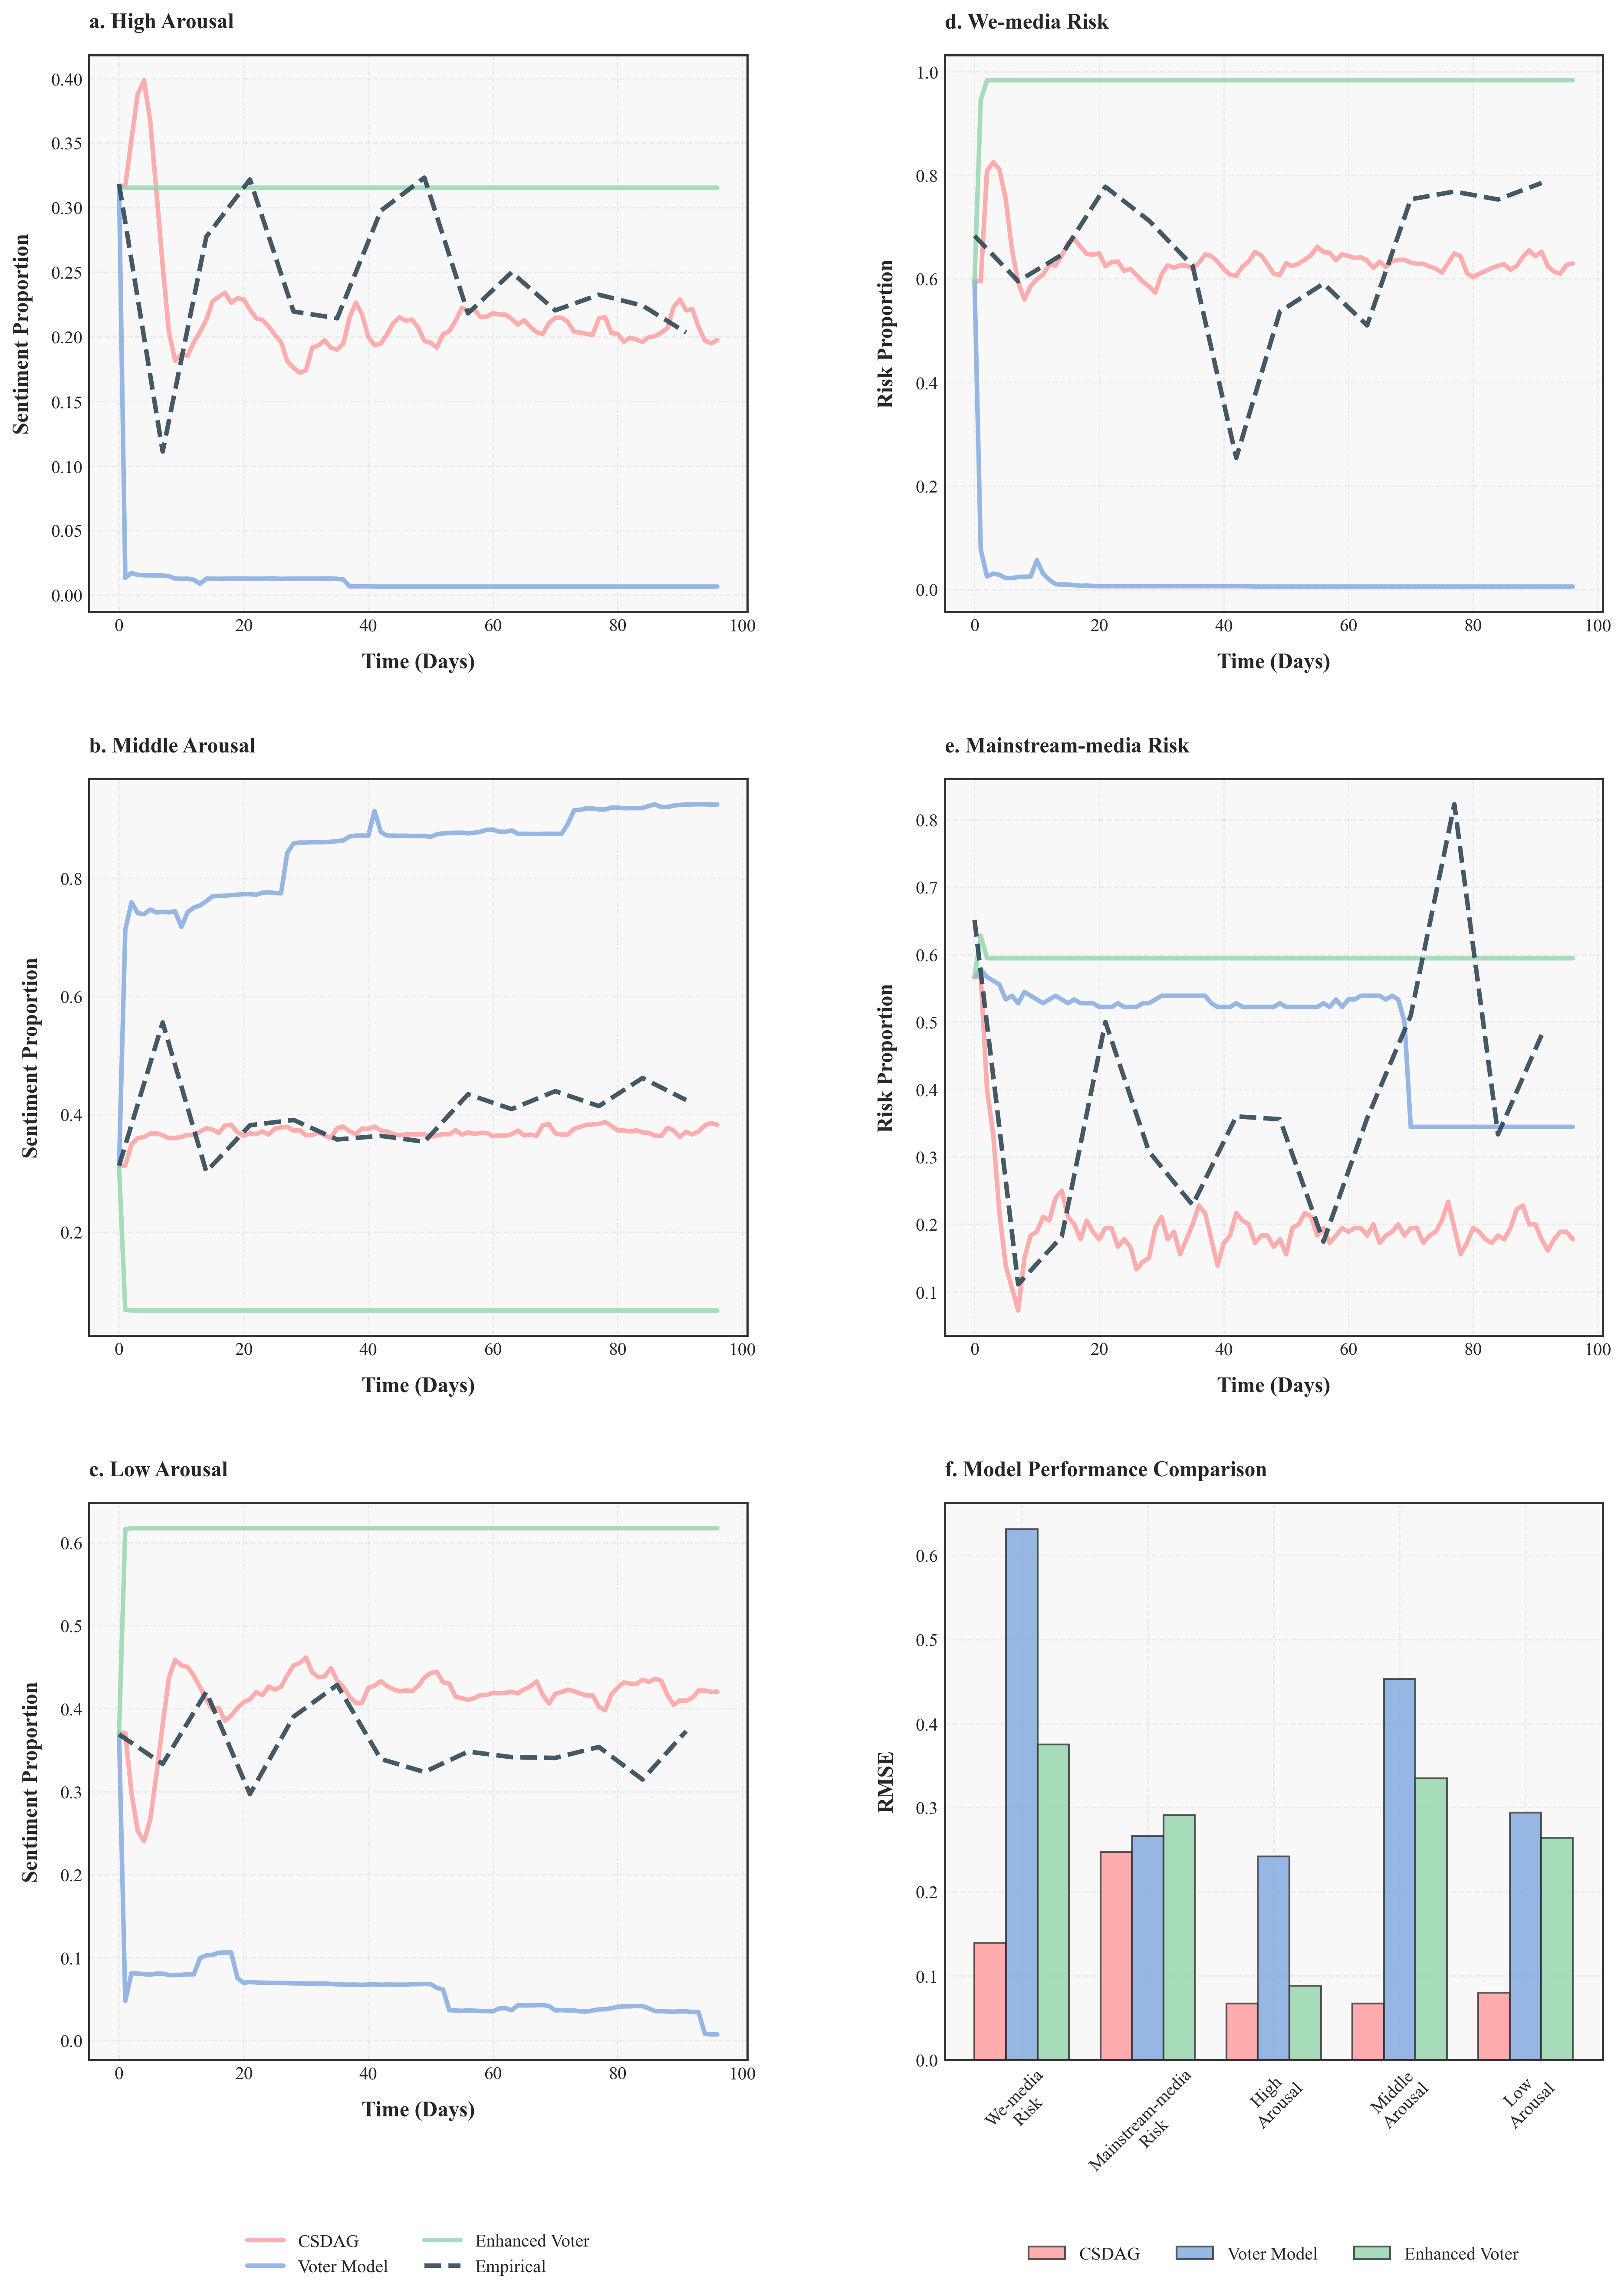

In [38]:
# 创建6个子图的布局，增加间距
fig = plt.figure(figsize=(15, 20))  # 增加整体高度
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)  # 增加垂直间距

# 创建6个子图的布局
fig = plt.figure(figsize=(15, 20))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 创建子图
axes = []
for i in range(6):
    ax = fig.add_subplot(gs[i//2, i%2])
    axes.append(ax)
    ax.set_facecolor('#F8F8F8')
    ax.grid(True, linestyle='--', alpha=0.3, color='#CCCCCC')
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('#333333')

# 第一列：情绪状态 (索引 0, 2, 4)
# High Arousal
plot_time_series(axes[0],
                [o_people_high_csdag, o_people_high_baseline, o_people_high_Enhanced, list(emp_sentiment_high_p.values())],
                ['CSDAG', 'Voter Model', 'Enhanced Voter', 'Empirical'],
                'a. High Arousal', 'Sentiment Proportion')

# Middle Arousal
plot_time_series(axes[2],
                [o_people_middle_csdag, o_people_middle_baseline, o_people_middle_Enhanced, list(emp_sentiment_middle_p.values())],
                ['CSDAG', 'Voter Model', 'Enhanced Voter', 'Empirical'],
                'b. Middle Arousal', 'Sentiment Proportion')

# Low Arousal
plot_time_series(axes[4],
                [o_people_low_csdag, o_people_low_baseline, o_people_low_Enhanced, list(emp_sentiment_low_p.values())],
                ['CSDAG', 'Voter Model', 'Enhanced Voter', 'Empirical'],
                'c. Low Arousal', 'Sentiment Proportion')

# 第二列：媒体风险和性能比较 (索引 1, 3, 5)
# We-media Risk
plot_time_series(axes[1], 
                [w_media_risk_csdag, w_media_risk_baseline, w_media_risk_Enhanced, list(emp_w_risk_p.values())],
                ['CSDAG', 'Voter Model', 'Enhanced Voter', 'Empirical'],
                'd. We-media Risk', 'Risk Proportion')

# Mainstream-media Risk
plot_time_series(axes[3],
                [m_media_risk_csdag, m_media_risk_baseline, m_media_risk_Enhanced, list(emp_m_risk_p.values())],
                ['CSDAG', 'Voter Model', 'Enhanced Voter', 'Empirical'],
                'e. Mainstream-media Risk', 'Risk Proportion')

# RMSE Comparison
metrics = ['We-media\nRisk', 'Mainstream-media\nRisk', 'High\nArousal', 'Middle\nArousal', 'Low\nArousal']
x = np.arange(len(metrics))
width = 0.25

bar_kwargs = {
    'width': width,
    'alpha': 0.8,
    'edgecolor': '#333333',
    'linewidth': 1
}

axes[5].bar(x - width, rmse_data['CSDAG'], label='CSDAG', 
           color=colors['models'][0], **bar_kwargs)
axes[5].bar(x, rmse_data['Voter'], label='Voter Model', 
           color=colors['models'][1], **bar_kwargs)
axes[5].bar(x + width, rmse_data['Enhanced'], label='Enhanced Voter', 
           color=colors['models'][2], **bar_kwargs)

axes[5].set_ylabel('RMSE', fontweight='bold', labelpad=10)
axes[5].set_title('f. Model Performance Comparison', loc='left', fontweight='bold', pad=15)
axes[5].set_xticks(x)
axes[5].set_xticklabels(metrics, rotation=45)
axes[5].legend(ncol=3, bbox_to_anchor=(0.5, -0.35), loc='center',
              frameon=True, facecolor='white', edgecolor='none')

# 调整整体布局
plt.tight_layout()